# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [2]:
# Pedir la interaccion con los aspectos necesarios del sistema operativo
import sys

# Instalar base de datos del Banco Mundial
!"{sys.executable}" -m pip install wbdata

# Importar base de datos
import wbdata

# Importar pandas (facilitan el trabajo con datos en forma de tablas)
import pandas as pd

# Definir el nombre de los indicadores
indicadores = {
    'NY.GDP.PCAP.CD': 'PBI per capita',
    'SL.UEM.TOTL.ZS': 'Tasa de desempleo'
}

# Obtener los datos desde World Bank
data = wbdata.get_dataframe(indicadores, country=['USA', 'ARG'])

# Formatear y organizar los datos
data = data.reset_index()  # Convierte índices en columnas
data = data.rename(columns={'date': 'Fecha', 'country': 'Pais'}) # Renombra las variables
df = pd.DataFrame(data=data) # Asigna las variables al dataframe de Pandas
df['Pais'] = df['Pais'].replace('United States', 'Estados Unidos') # Traducir al español

df.head(100) # Muestra las primeras 100 filas de un dataframe

,Pais,Fecha,PBI per capita,Tasa de desempleo
0,Argentina,2023,14187.482725,6.139
1,Argentina,2022,13935.681111,6.805
2,Argentina,2021,10738.017922,8.736
3,Argentina,2020,8535.599380,11.461
4,Argentina,2019,9955.974787,9.843
...,...,...,...,...
95,Estados Unidos,1992,25418.990776,7.500
96,Estados Unidos,1991,24342.258905,6.800
97,Estados Unidos,1990,23888.600009,NaN
98,Estados Unidos,1989,22857.154433,NaN


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [3]:
# Crear tablas con los datos de cada indicador
df_pbi = data.pivot_table(index='Fecha', columns='Pais', values='PBI per capita')
df_desempleo = data.pivot_table(index='Fecha', columns='Pais', values='Tasa de desempleo')

# Filtrar ambos DataFrames para que solo contengan los años comunes.
años_comunes = df_pbi.index.intersection(df_desempleo.index)
df_pbi = df_pbi.loc[años_comunes]
df_desempleo = df_desempleo.loc[años_comunes]

# Redondear valores
df_pbi = df_pbi.round()
df_desempleo = df_desempleo.round()

# Configurar formato de salida para evitar notación científica
pd.options.display.float_format = '{:.0f}'.format

#Generar los cuadros de estadistica descriptiva con los nombres en español
print("\n📊 Estadísticas descriptivas del PBI per cápita:")
df_pbi = df_pbi.describe().rename(index={'count': 'cantidad', 'mean': 'promedio', 'std': 'Desvio estandar'}) #Cambiar nombres de las filas al español
print(df_pbi)

print("\n📊 Estadísticas descriptivas de la tasa de desempleo:")
desc_desempleo = df_desempleo.describe().rename(index={'count': 'cantidad', 'mean': 'promedio', 'std': 'Desvio estandar'}) #Cambiar nombres de las filas al español
print(desc_desempleo)


📊 Estadísticas descriptivas del PBI per cápita:
Pais             Argentina  United States
cantidad                33             33
promedio              9007          46920
Desvio estandar       3293          15495
min                   2570          24342
25%                   7141          34515
50%                   8150          47195
75%                  12233          57040
max                  14533          82769

📊 Estadísticas descriptivas de la tasa de desempleo:
Pais             Argentina  United States
cantidad                33             33
promedio                11              6
Desvio estandar          4              2
min                      5              4
25%                      8              5
50%                      9              5
75%                     14              7
max                     20             10


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

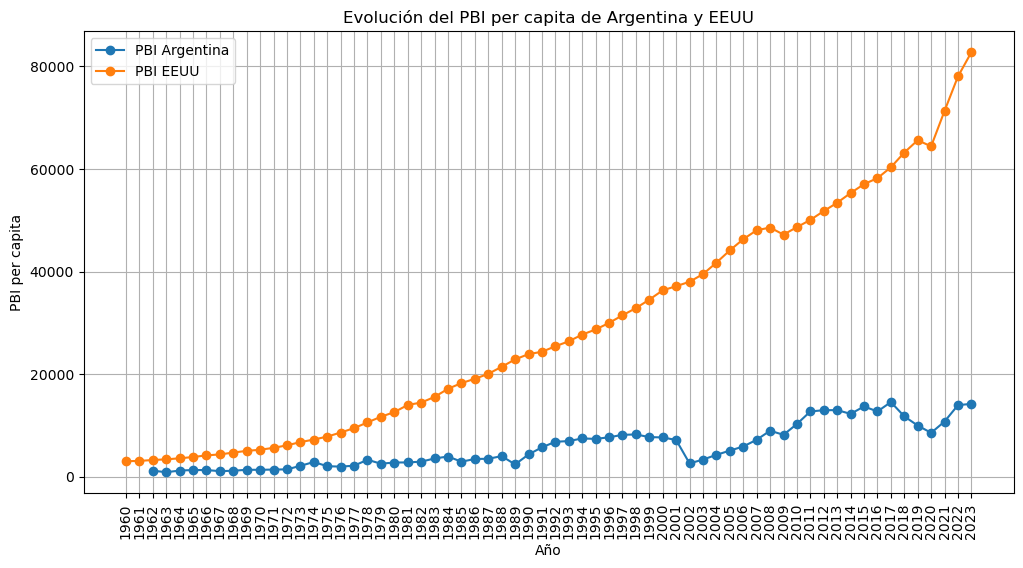

In [6]:
import matplotlib.pyplot as plt 

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_pbi.index, df_pbi['Argentina'], label='PBI Argentina', marker='o')
plt.plot(df_pbi.index, df_pbi['United States'], label='PBI EEUU', marker='o')
plt.xticks(rotation=90)    

plt.xlabel('Año')  
# Agrega una etiqueta al eje X del gráfico. En este caso, indica que  
# el eje X representa los años.  

plt.ylabel('PBI per capita')  
# Agrega una etiqueta al eje Y del gráfico. En este caso, indica que  
# el eje Y representa la tasa de desempleo.  

plt.title('Evolución del PBI per capita de Argentina y EEUU')  
# Establece un título para el gráfico. El título indica que el gráfico  
# muestra la evolución del PBI per cápita de Argentina y EE.UU.  
# Nota: Parece que hay una inconsistencia entre el título y la etiqueta del eje Y.  
# Si el gráfico muestra la tasa de desempleo, el título debería reflejarlo.  

plt.legend()  
# Muestra la leyenda del gráfico. La leyenda es útil si hay múltiples líneas  
# o series de datos en el gráfico. Para que funcione correctamente,  
# las líneas del gráfico deben tener etiquetas (`label='...'`) definidas.  

plt.grid(True)  
# Activa la cuadrícula en el gráfico, lo que facilita la lectura  
# de los valores en los ejes X e Y.  

plt.show()  
# Muestra el gráfico generado. Sin esta línea, el gráfico no aparecerá  
# en algunos entornos, como scripts de Python sin entornos interactivos.  


 


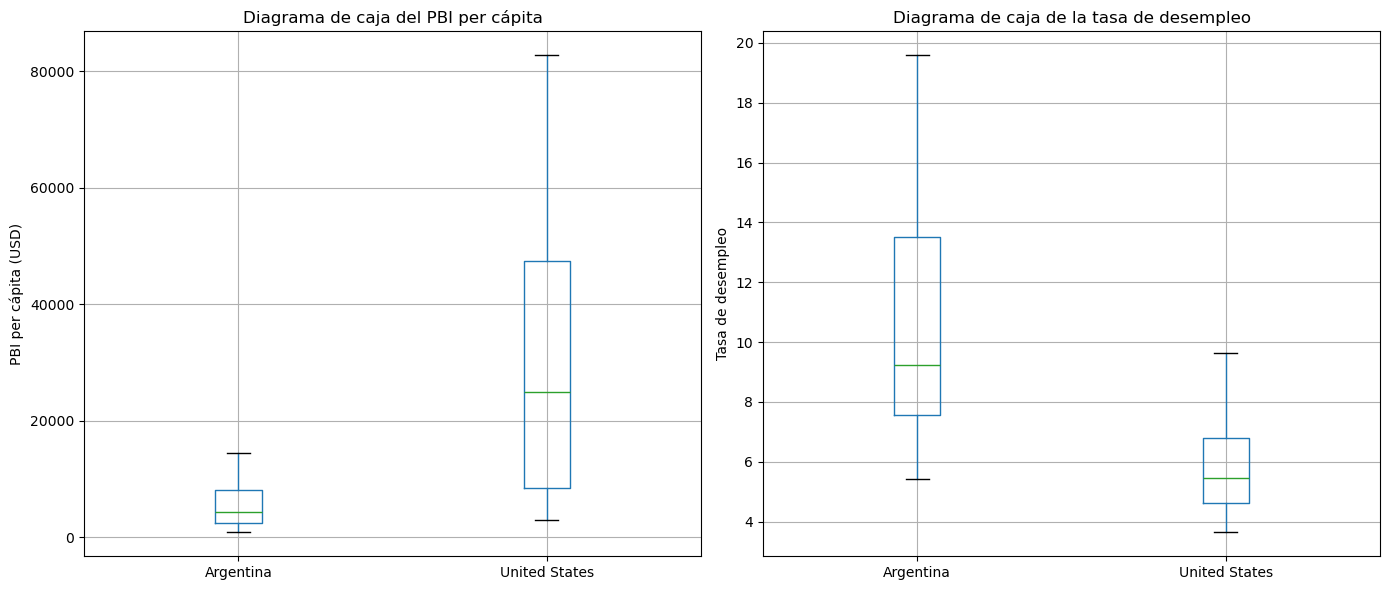

In [7]:



# 🔹 Creamos una figura con 2 subgráficos en la misma visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  #  1 fila y 2 columnas, tamaño de la figura de 14x6 pulgadas
# 🔹 Gráfico de caja (boxplot) para el PIB per cápita

df_pbi_per_capita.boxplot(ax=axes[0])  #  Generamos el diagrama de caja en la primera posición (izquierda)
axes[0].set_title('Diagrama de caja del PBI per cápita')  #  Título del gráfico
axes[0].set_ylabel('PBI per cápita (USD)')  #  Etiqueta del eje Y

# 🔹 Gráfico de caja para la tasa de desempleo
df_desempleo.boxplot(ax=axes[1])  #  Generamos el diagrama de caja en la segunda posición (derecha)
axes[1].set_title('Diagrama de caja de la tasa de desempleo')  #  Título del gráfico
axes[1].set_ylabel('Tasa de desempleo')  #  Etiqueta del eje Y

plt.tight_layout()  #  Ajustamos la disposición de los gráficos para evitar solapamientos
plt.show()  


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [18]:
# Instalación de librerías (si no están instaladas, descomentar estas líneas y ejecutarlas)
# pip install requests       # Instala la librería requests para hacer peticiones HTTP
# pip install BeautifulSoup4 # Instala la librería BeautifulSoup4 para analizar HTML
# pip install pandas         # Instala la librería pandas para manipulación de datos
# pip install openpyxl       # Instala openpyxl para trabajar con archivos de Excel

# Importación de librerías necesarias
import requests             # Permite hacer peticiones a páginas web para obtener su contenido HTML
from bs4 import BeautifulSoup # Se usa para analizar HTML y extraer información
import pandas as pd         # Facilita la manipulación y análisis de datos en tablas (DataFrames)


In [20]:

# Definimos la URL que queremos scrapear (en este caso, la página principal de La Nación)
url = "https://www.lanacion.com.ar/"

# Hacemos una solicitud GET para obtener el contenido de la página
# requests.get() envía una petición al servidor web y nos devuelve una respuesta
r = requests.get(url)  

# Obtenemos el contenido HTML de la respuesta
# r.content nos da el HTML en formato binario que BeautifulSoup puede procesar
contenido = r.content  

# Creamos un objeto BeautifulSoup para parsear y navegar el HTML
# "html.parser" es el analizador que usaremos (alternativas: lxml, html5lib)
soup = BeautifulSoup(contenido, "html.parser")  

# Mostramos el resultado del parseo (esto es útil en consola interactiva)
# En un script normal, normalmente no haríamos esto, sino que extraeríamos datos específicos
soup

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/ricardo-D7LXKJZ4KREMJKLX22YLUPMFUY.jpg?auth=085724d6e39df40b552cca2a70dbf5e139d93bdbfab9715326c2fe51d009e700&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/ricardo-D7LXKJZ4KREMJKLX22YLUPMFUY.jpg?auth=085724d6e39df40b552cca2a70dbf5e139d93bdbfab9715326c2fe51d009e700&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/-5X5IC5JNFNFOXIEJ7MO53V53VY.jpg?a

In [21]:
# 🔹 Encontrar los enlaces de las noticias dentro del HTML
noticias = soup.find_all("a", href=True)  # Busca todas las etiquetas <a> que contengan un atributo "href" (enlace)

# 🔹 Filtrar los links de noticias
links = set()  # Creamos un conjunto vacío para almacenar los enlaces únicos (evitamos duplicados)

for noticia in noticias:  # Iteramos sobre cada elemento encontrado en la variable "noticias"
    href = noticia["href"]  # Extraemos el valor del atributo "href" (el enlace)

    # 🔹 Si el enlace es relativo (empieza con "/"), lo convertimos en absoluto agregando la URL base
    if href.startswith("/"):
        links.add(f"https://www.lanacion.com.ar{href}")  # Agregamos la URL completa al conjunto "links"

    # 🔹 Si el enlace ya es absoluto y contiene "lanacion.com.ar", lo agregamos directamente
    elif "lanacion.com.ar" in href:
        links.add(href)  # Agregamos la URL directamente al conjunto "links"

# 🔹 Mostrar los links encontrados
for link in links:  # Iteramos sobre cada link único almacenado en el conjunto "links"
    print(link)  # Imprimimos el enlace


https://www.lanacion.com.ar/economia/campo/agricultura/
https://www.lanacion.com.ar/politica/
https://www.lanacion.com.ar/revista-lugares/
https://lnmas.lanacion.com.ar/
https://www.lanacion.com.ar/revista-lugares/la-isla-de-elite-que-dejo-de-ser-secreta-y-se-preserva-como-paraiso-al-natural-nid04042025/
https://www.lanacion.com.ar/economia/indices/
https://www.lanacion.com.ar/salud/vida_sana/los-peores-habitos-para-tu-espalda-segun-cirujanos-de-columna-nid04042025/
https://club.lanacion.com.ar/
https://www.lanacion.com.ar/que-sale/de-narda-lepes-a-betular-quienes-son-los-mas-de-40-reconocidos-chefs-que-cocinaran-por-bahia-blanca-nid02042025/
https://www.lanacion.com.ar/lifestyle/
https://www.lanacion.com.ar/juegos/nexos/
https://www.lanacion.com.ar/opinion/columnistas/
https://www.lanacion.com.ar/economia/campo/tecnologias/
https://www.lanacion.com.ar/editoriales/falsas-promesas-de-humo-nid04042025/
https://www.lanacion.com.ar/sabado/el-52-de-los-argentinos-experimenta-por-fuera-del-f

In [22]:
# 🔹 Crear un DataFrame con los enlaces de noticias
df = pd.DataFrame(links, columns=["Links de Noticias"])  
# Creamos un DataFrame de Pandas con los enlaces almacenados en "links".
# La columna se llama "Links de Noticias" para identificar mejor la información.

# 🔹 Guardar el DataFrame en un archivo Excel
df.to_excel("noticias.xlsx", index=False, engine="openpyxl")  
# Guardamos el DataFrame en un archivo llamado "noticias.xlsx".
# "index=False" evita que Pandas agregue una columna extra con los índices.
# "engine='openpyxl'" se usa para manejar archivos de Excel en formato .xlsx.

# 🔹 Mensaje de confirmación
print("Archivo Excel guardado exitosamente.")  
# Imprimimos un mensaje indicando que el archivo fue guardado correctamente.


Archivo Excel guardado exitosamente.
